### **Linear Regression**

This data deals with baseflow. Each row corresponds to one data point (a river segment during one month). The columns are:

*  **Date** – number of days since 01/01/0000


*  **Segment id** – an identifier of the segment of river; it can be treated as a categorical variable

*  **x/y** – the spatial location of the gaging station at which observations are obtained

*  **Evapotranspiration** (Links to an external site.) – the evapotranspiration amount of an area adjacent to the river segment in the given month

*  **Precipitation** - the precipitation amount of an area adjacent to the river segment in the given month

*  **Irrigation pumping** - the amount of groundwater pumped out for irrigation in an area adjacent to the river segment in the given month

*  **Observed** – observed baseflow

The target variable is Observed. We want to use linear regression to predict what the baseflow will be.

Your task is to experiment with linear regression on this dataset. This is a difficult dataset to interpret, and most of your time will be looking at scatterplots, looking at the data over time, looking at positional data, looking at individual segments, and doing background research. Just running regression and looking at the p values for different attributes is most definitely not enough.

### Importing Packages

In [ ]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from google.colab import drive

%matplotlib inline

In [ ]:
# for Mariyum
drive.mount('/content/drive')
% cd "/content/drive/MyDrive/Project6"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Project6


### Reading Data

In [ ]:
originaldf = pd.read_csv('RRCA_baseflow.csv')
originaldf

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689
...,...,...,...,...,...,...,...,...
15586,721810,98,721870,14387040,0.00,0.00,0.0,0.298500
15587,721841,98,721870,14387040,0.00,0.00,0.0,0.211475
15588,721871,98,721870,14387040,0.00,0.00,0.0,0.122951
15589,721902,98,721870,14387040,0.00,0.00,0.0,0.120000


In [ ]:
# segments = ['144','154','176','171','152','55','118','65','64','63','40','135','53','123','157','147','170','136','149','60','188','194','239','256','205','59','148','138','62','96','178','186','159','130','97','51','145','196','146','189','56']
segments = list(originaldf.Segment_id.unique())
print(len(segments))
segDict = {s: i for i, s in enumerate(segments)}
extremaList = [[float('inf'), -float('inf')] for _ in segments]


42


In [ ]:
originaldf.info()
originaldf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15591 entries, 0 to 15590
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                15591 non-null  int64  
 1   Segment_id          15591 non-null  int64  
 2   x                   15591 non-null  int64  
 3   y                   15591 non-null  int64  
 4   Evapotranspiration  15591 non-null  float64
 5   Precipitation       15591 non-null  float64
 6   Irrigation_pumping  15591 non-null  float64
 7   Observed            15591 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 974.6 KB


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
count,15591.000000,15591.000000,1.559100e+04,1.559100e+04,15591.000000,15591.000000,15591.000000,15591.000000
mean,719206.175358,126.589892,1.169435e+06,1.457066e+07,2.687491,14.915469,-0.090713,23.986754
std,6287.339388,52.789605,2.924991e+05,8.331048e+04,3.167235,10.512909,0.273726,56.275292
min,708479.000000,40.000000,7.218700e+05,1.438704e+07,0.000000,0.000000,-3.164700,-22.000000
25%,713623.000000,64.000000,9.066700e+05,1.454544e+07,0.000000,0.000000,-0.012000,1.985455
50%,718858.000000,145.000000,1.170670e+06,1.456128e+07,1.040000,17.490000,0.000000,7.703934
75%,724642.000000,171.000000,1.392430e+06,1.461936e+07,5.340000,22.370000,0.000000,22.804139
max,730729.000000,256.000000,1.941550e+06,1.476720e+07,12.100000,40.380000,0.000000,747.803280


In [ ]:
# reading the data into a DataFrame
data = pd.read_csv('newImproved.csv')
data['Date'] = data['Date'].astype(int)
data.head()

,Date,144,154,176,171,152,55,118,65,64,...,y,Evapotranspiration,Precipitation,Irrigation_pumping,preDam,giant,large,med,small,Observed
0,710732,1,0,0,0,0,0,0,0,0,...,14476800,0.59,18.99,0.0,1,0,0,1,0,0.145161
1,710763,1,0,0,0,0,0,0,0,0,...,14476800,0.97,29.63,0.0,1,0,0,1,0,0.445161
2,710791,1,0,0,0,0,0,0,0,0,...,14476800,1.34,29.63,0.0,1,0,0,1,0,1.332203
3,710822,1,0,0,0,0,0,0,0,0,...,14476800,1.79,29.63,0.0,1,0,0,1,0,2.932203
4,710852,1,0,0,0,0,0,0,0,0,...,14476800,8.23,29.63,0.0,1,0,0,1,0,3.728689


In [ ]:
# data.info()

### Analyzing Data

#### Scatter Plots

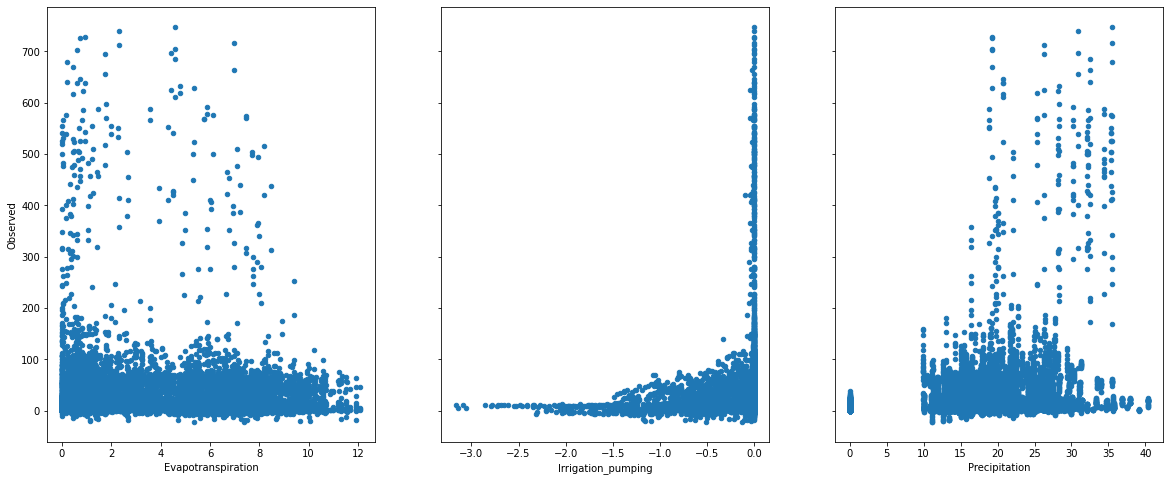

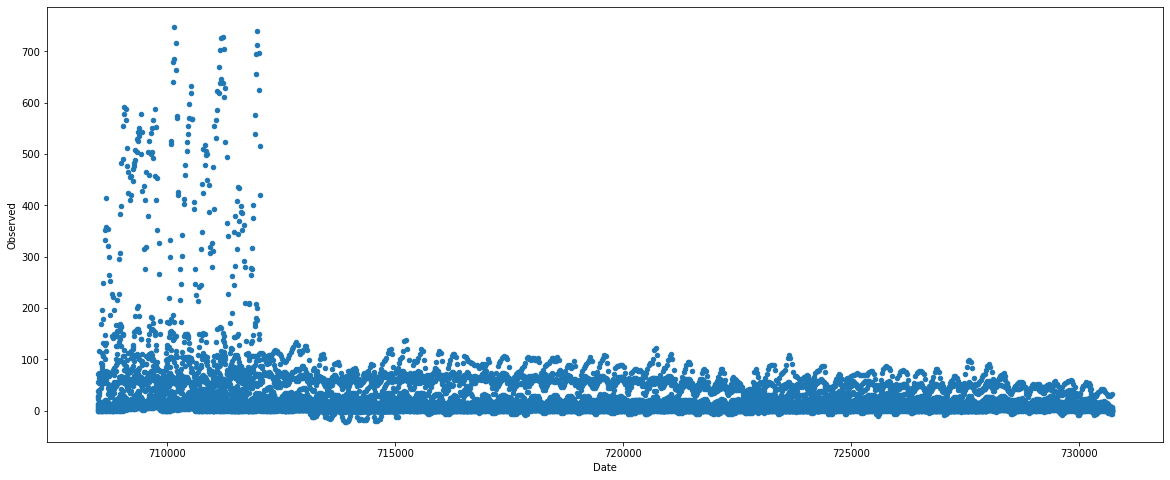

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[0], figsize=(20, 8))
data.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[1])
data.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[2])
data.plot(kind='scatter', x='Date', y='Observed', figsize=(20, 8)) 

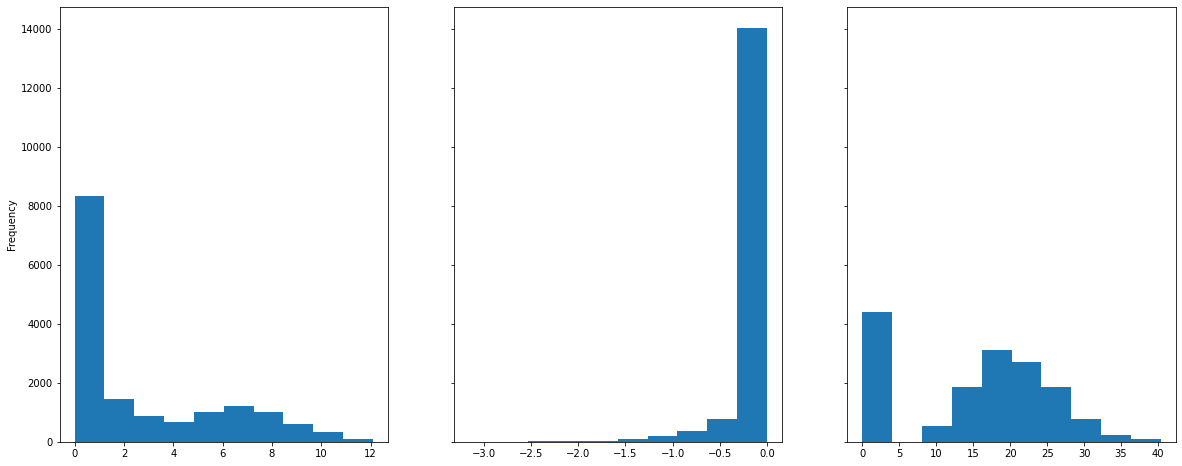

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True)

data['Evapotranspiration'].plot(kind='hist', x='Evapotranspiration', ax=axs[0], figsize=(20, 8))
data['Irrigation_pumping'].plot(kind='hist', x='Irrigation_pumping', ax=axs[1])
data['Precipitation'].plot(kind='hist', x='Precipitation', ax=axs[2])

In [ ]:
# data['Precipitation'].plot(kind='hist', x='Precipitation')

In [ ]:
# data['Irrigation_pumping'].plot(kind='hist', x='Irrigation_pumping')

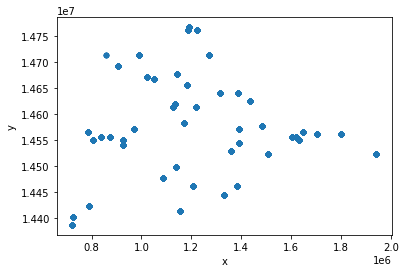

In [ ]:
data.plot(kind='scatter', x='x', y='y')

In [ ]:
# data['Segment_id'].plot(kind='kde', x='Segment_id')

### Sorting Segments

In [ ]:
for _, datum in originaldf.iterrows():
  seg = segDict[datum['Segment_id']]
  extremaList[seg] = [min(extremaList[seg][0], datum['Observed']), max(extremaList[seg][1], datum['Observed'])]
extremaList = np.array(extremaList)

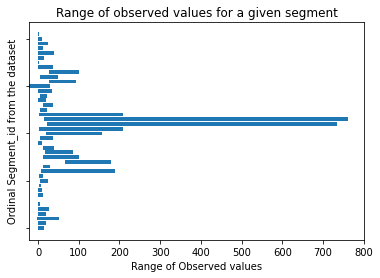

In [ ]:
mins = extremaList[:,0]
maxs = extremaList[:,1]

plt.barh(range(len(segments)), maxs, left=mins)
plt.xlabel('Range of Observed values')
plt.ylabel('Ordinal Segment_id from the dataset')
plt.title('Range of observed values for a given segment')
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.show()

# for i, [minx, maxx] in enumerate(extremaList):
#   print(segments[i], minx, maxx)

In [ ]:
[35,80,140]

[35, 80, 140]

#### **Date** 

144


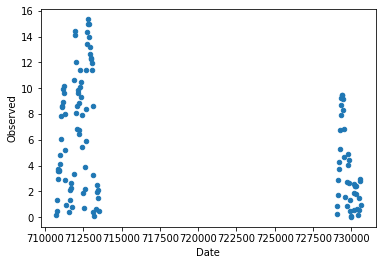

154


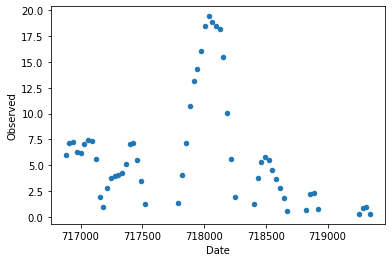

176


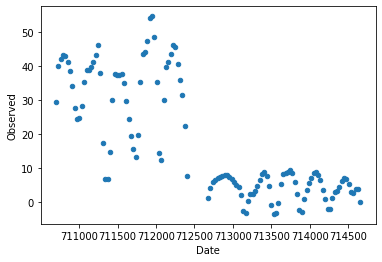

171


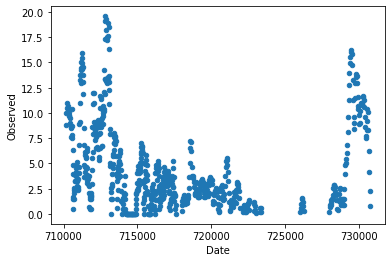

152


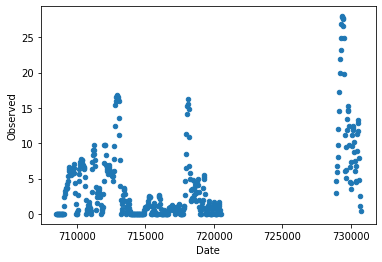

55


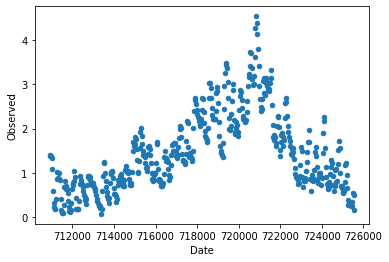

118


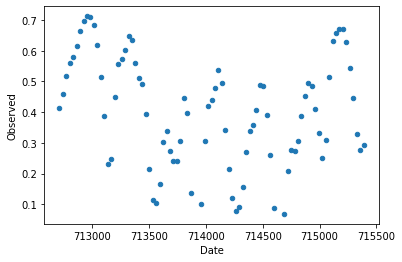

65


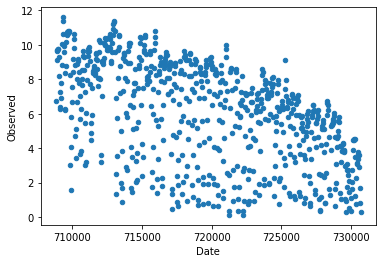

64


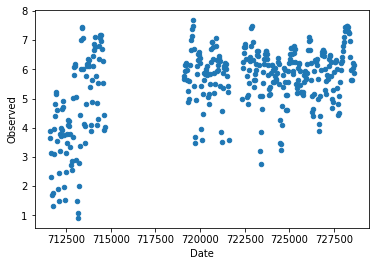

63


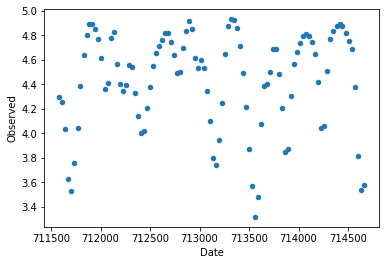

40


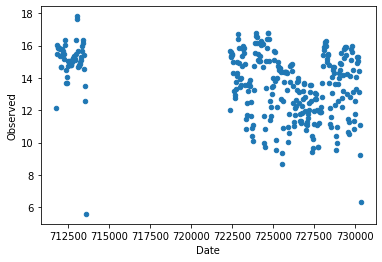

135


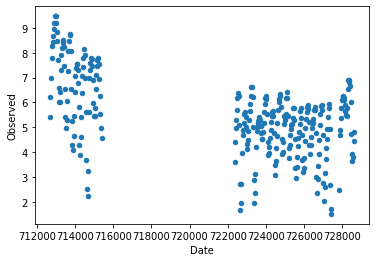

53


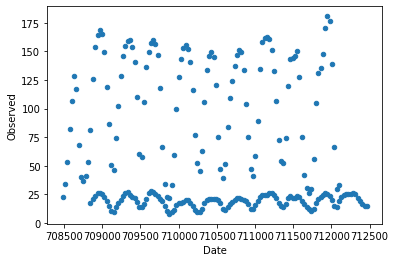

123


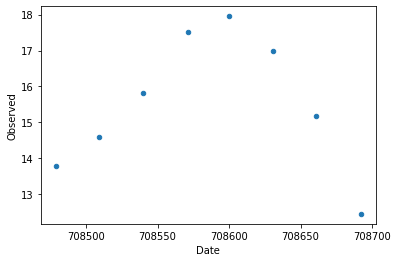

157


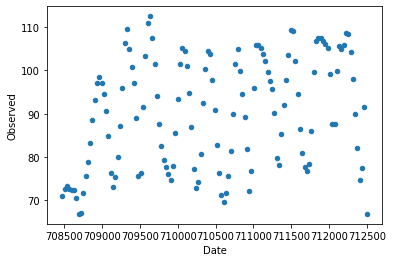

147


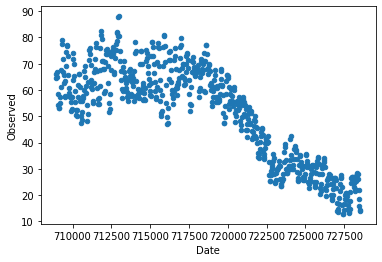

170


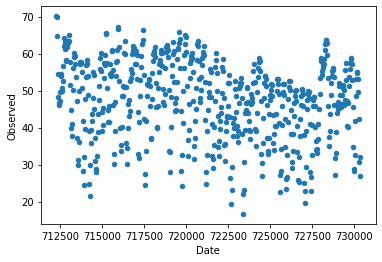

136


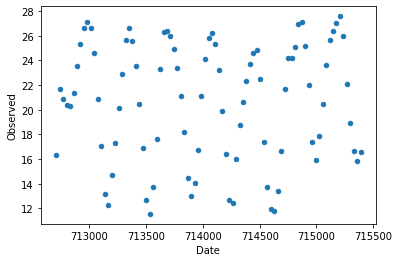

149


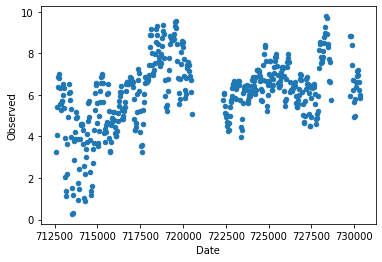

60


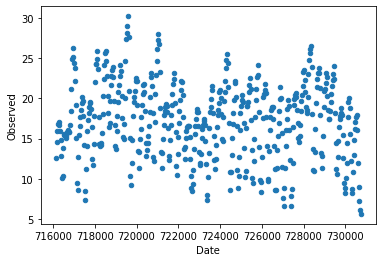

188


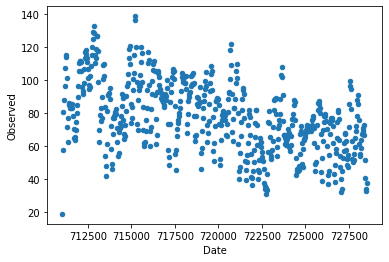

194


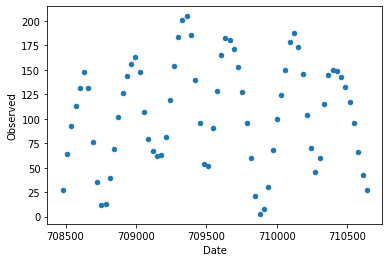

239


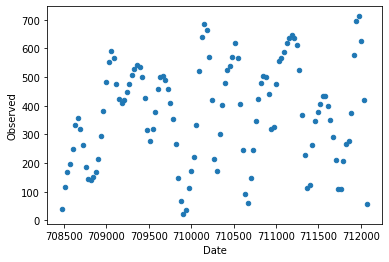

256


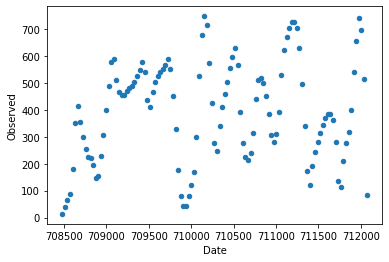

205


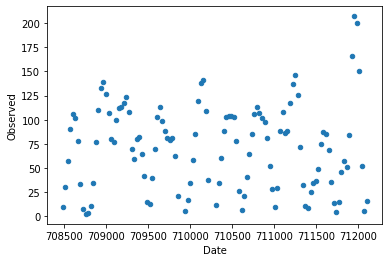

59


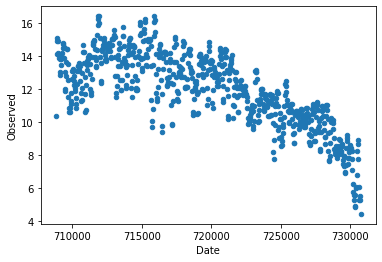

148


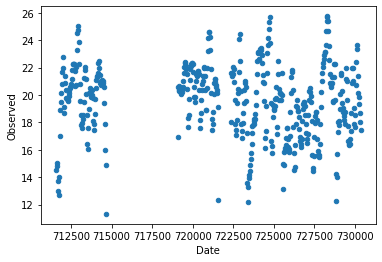

138


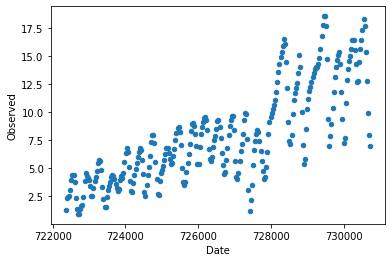

62


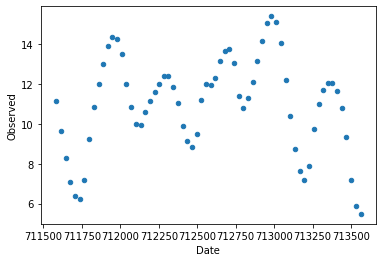

96


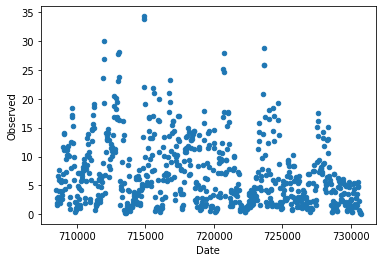

178


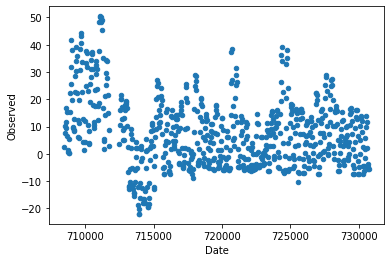

186


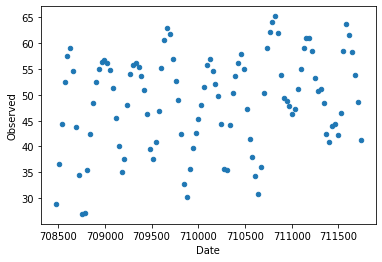

159


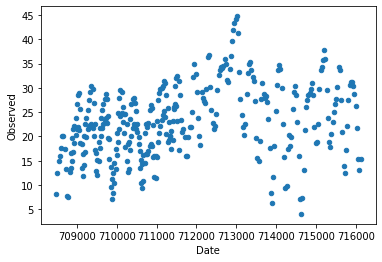

130


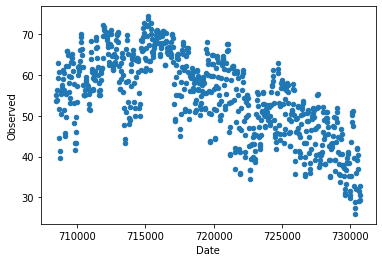

97


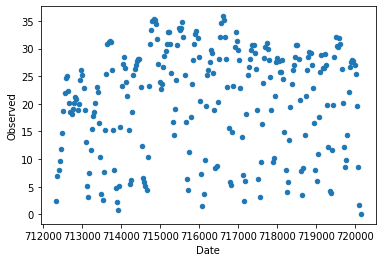

51


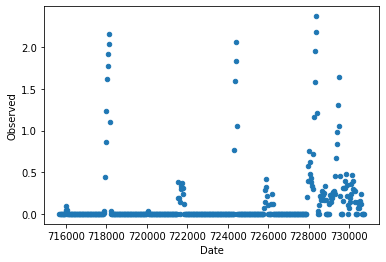

145


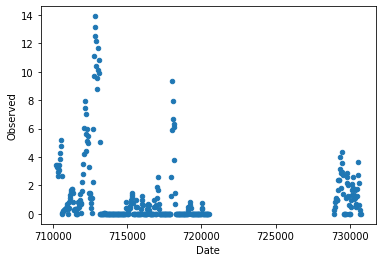

196


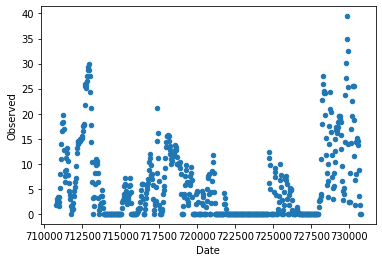

146


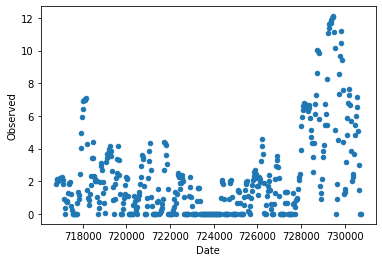

189


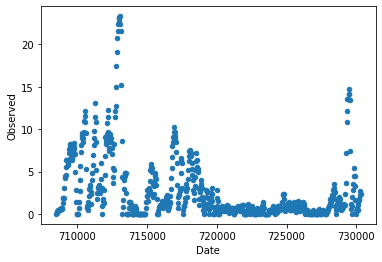

56


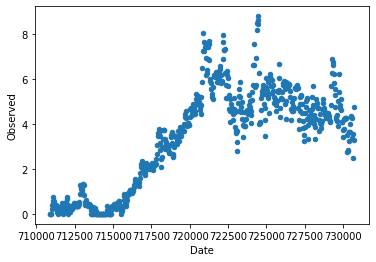

98


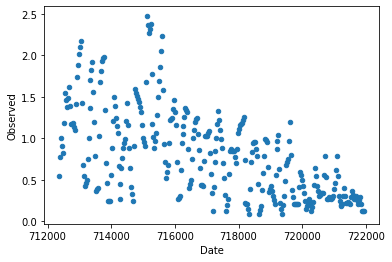

In [ ]:
for s in segments:
    print(s)
    data[data[str(s)]==1].plot(kind='scatter', x='Date', y='Observed')
    plt.show()

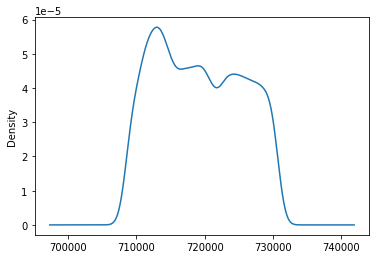

In [ ]:
data['Date'].plot(kind='kde', x='Date')

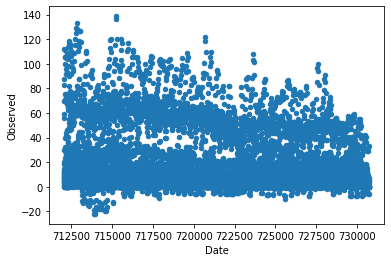

In [ ]:
data[data['Date'] > 712040].plot(kind='scatter', x='Date', y='Observed')

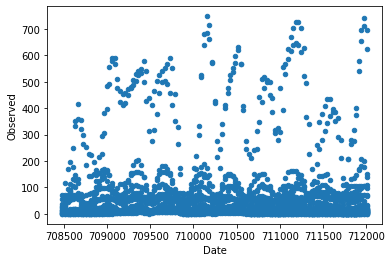

In [ ]:
data[data['Date'] < 712040].plot(kind='scatter', x='Date', y='Observed')


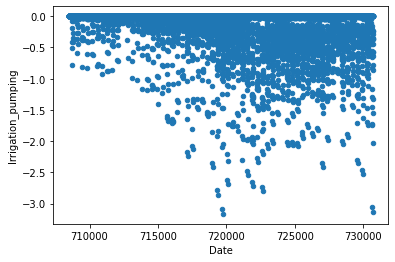

In [ ]:
data.plot(kind='scatter', y='Irrigation_pumping', x='Date')

#### Regression Plots of Quant Variables

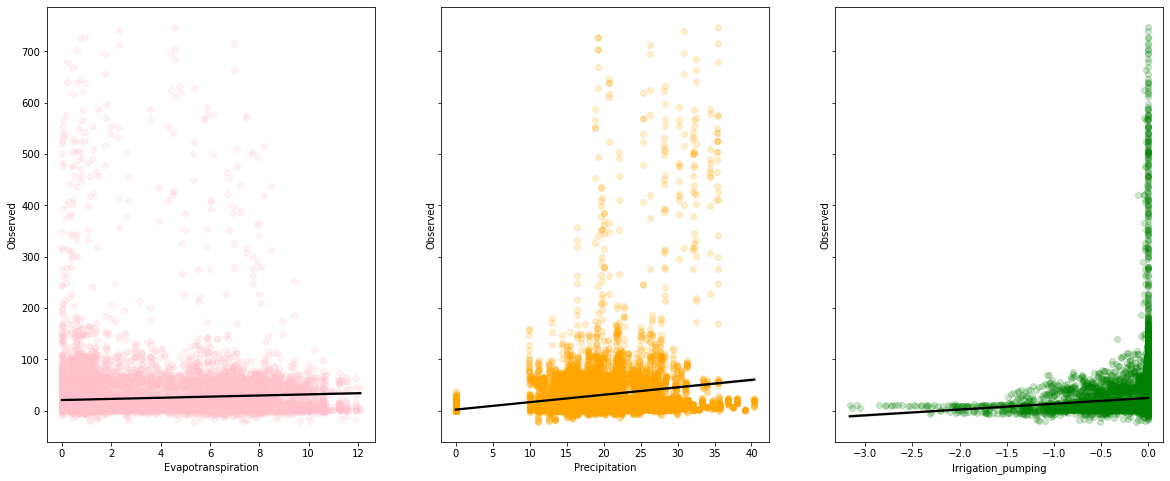

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(20, 8))

# plt.figure()
ax = sns.regplot(x='Evapotranspiration', y='Observed', data=data, ax=axs[0]
                 ,color = "pink", scatter_kws={'alpha':0.2}
                 ,line_kws={'color': 'black'})

# plt.figure()
ax = sns.regplot(x='Precipitation', y='Observed', data=data, ax=axs[1]
                 ,color = "orange", scatter_kws={'alpha':0.2}
                 ,line_kws={'color': 'black'})

# plt.figure()
ax = sns.regplot(x='Irrigation_pumping', y='Observed', data=data, ax=axs[2]
                 ,color = "green", scatter_kws={'alpha':0.2}
                 ,line_kws={'color': 'black'})


### Hypothesis Testing & P-values

In [ ]:
lm = smf.ols(formula='Observed ~ Evapotranspiration', data=data).fit()
# print the p-values for the model coefficients
print ("---P-values---")
print (lm.pvalues)
print ("---Parameters---")
print (lm.params)

---P-values---
Intercept             3.106939e-267
Evapotranspiration     7.285232e-15
dtype: float64
---Parameters---
Intercept             21.014344
Evapotranspiration     1.106017
dtype: float64


In [ ]:
lm = smf.ols(formula='Observed ~ Precipitation', data=data).fit()
# print the p-values for the model coefficients
print ("---P-values---")
print (lm.pvalues)
print ("---Parameters---")
print (lm.params)

---P-values---
Intercept         1.277606e-03
Precipitation    1.191739e-258
dtype: float64
---Parameters---
Intercept        2.426735
Precipitation    1.445480
dtype: float64


In [ ]:
lm = smf.ols(formula='Observed ~ Irrigation_pumping', data=data).fit()
# print the p-values for the model coefficients
print ("---P-values---")
print (lm.pvalues)
print ("---Parameters---")
print (lm.params)

---P-values---
Intercept             0.000000e+00
Irrigation_pumping    7.824229e-12
dtype: float64
---Parameters---
Intercept             25.007945
Irrigation_pumping    11.257441
dtype: float64


In [ ]:
lm = smf.ols(formula='Observed ~ Date', data=data).fit()
# print the p-values for the model coefficients
print ("---P-values---")
print (lm.pvalues)
print ("---Parameters---")
print (lm.params)

---P-values---
Intercept    6.877169e-199
Date         5.953725e-193
dtype: float64
---Parameters---
Intercept    1530.463274
Date           -0.002095
dtype: float64


In [ ]:
lm = smf.ols(formula='Observed ~ preDam', data=data).fit()
# print the p-values for the model coefficients
print ("---P-values---")
print (lm.pvalues)
print ("---Parameters---")
print (lm.params)

---P-values---
Intercept    1.569552e-246
preDam        0.000000e+00
dtype: float64
---Parameters---
Intercept    15.755325
preDam       52.726459
dtype: float64


In [ ]:
lm = smf.ols(formula='Observed ~ giant', data=data).fit()
# print the p-values for the model coefficients
print ("---P-values---")
print (lm.pvalues)
print ("---Parameters---")
print (lm.params)

---P-values---
Intercept    0.0
giant        0.0
dtype: float64
---Parameters---
Intercept    17.380466
giant        91.717393
dtype: float64


In [ ]:
lm = smf.ols(formula='Observed ~ large', data=data).fit()
# print the p-values for the model coefficients
print ("---P-values---")
print (lm.pvalues)
print ("---Parameters---")
print (lm.params)

---P-values---
Intercept    0.000000e+00
large        1.182441e-86
dtype: float64
---Parameters---
Intercept    19.744295
large        22.652116
dtype: float64


In [ ]:
lm = smf.ols(formula='Observed ~ med', data=data).fit()
# print the p-values for the model coefficients
print ("---P-values---")
print (lm.pvalues)
print ("---Parameters---")
print (lm.params)

---P-values---
Intercept     0.000000e+00
med          8.619263e-158
dtype: float64
---Parameters---
Intercept    36.942465
med         -23.932759
dtype: float64


In [ ]:
lm = smf.ols(formula='Observed ~ small', data=data).fit()
# print the p-values for the model coefficients
print ("---P-values---")
print (lm.pvalues)
print ("---Parameters---")
print (lm.params)

---P-values---
Intercept    0.000000e+00
small        7.416214e-92
dtype: float64
---Parameters---
Intercept    28.528105
small       -22.781274
dtype: float64


### How Well Does the Model Fit the data? (R-squared)


In [ ]:
# Print the R-squared value for the model using statsmodels
lm = smf.ols(formula='Observed ~ Evapotranspiration', data=data).fit()
print ("R-squared for the model:")
display(lm.rsquared)

# Print the R-squared value for the model using sklearn
lm = LinearRegression()
lm.fit(data[['Evapotranspiration']], data.Observed)
display(lm.score(data[['Evapotranspiration']], data.Observed))

R-squared for the model:


0.003874792109565983

0.00387479210956565

In [ ]:
# Print the R-squared value for the model using statsmodels
lm = smf.ols(formula='Observed ~ Precipitation', data=data).fit()
print ("R-squared for the model:")
display(lm.rsquared)

# Print the R-squared value for the model using sklearn
lm = LinearRegression()
lm.fit(data[['Precipitation']], data.Observed)
display(lm.score(data[['Precipitation']], data.Observed))

R-squared for the model:


0.07291799577935498

0.07291799577935554

In [ ]:
# Print the R-squared value for the model using statsmodels
lm = smf.ols(formula='Observed ~ Irrigation_pumping', data=data).fit()
print ("R-squared for the model:")
display(lm.rsquared)

# Print the R-squared value for the model using sklearn
lm = LinearRegression()
lm.fit(data[['Irrigation_pumping']], data.Observed)
display(lm.score(data[['Irrigation_pumping']], data.Observed))

R-squared for the model:


0.002998304126610507

0.002998304126610729

In [ ]:
# Print the R-squared value for the model using statsmodels
lm = smf.ols(formula='Observed ~ preDam', data=data).fit()
print ("R-squared for the model:")
display(lm.rsquared)

# Print the R-squared value for the model using sklearn
lm = LinearRegression()
lm.fit(data[['preDam']], data.Observed)
display(lm.score(data[['preDam']], data.Observed))

R-squared for the model:


0.11565890102347065

0.11565890102347054

In [ ]:
variable = 'giant'
# Print the R-squared value for the model using statsmodels
lm = smf.ols(formula='Observed ~ '+variable, data=data).fit()
print ("R-squared for the model:")
display(lm.rsquared)

# Print the R-squared value for the model using sklearn
lm = LinearRegression()
lm.fit(data[[variable]], data.Observed)
display(lm.score(data[[variable]], data.Observed))

R-squared for the model:


0.17755628701566684

0.17755628701566684

In [ ]:
variable = 'large'
# Print the R-squared value for the model using statsmodels
lm = smf.ols(formula='Observed ~ '+variable, data=data).fit()
print ("R-squared for the model:")
display(lm.rsquared)

# Print the R-squared value for the model using sklearn
lm = LinearRegression()
lm.fit(data[[variable]], data.Observed)
display(lm.score(data[[variable]], data.Observed))

R-squared for the model:


0.02466355589470237

0.02466355589470237

In [ ]:
variable = 'med'
# Print the R-squared value for the model using statsmodels
lm = smf.ols(formula='Observed ~ '+variable, data=data).fit()
print ("R-squared for the model:")
display(lm.rsquared)

# Print the R-squared value for the model using sklearn
lm = LinearRegression()
lm.fit(data[[variable]], data.Observed)
display(lm.score(data[[variable]], data.Observed))

R-squared for the model:


0.044909597683101654

0.044909597683101876

In [ ]:
variable = 'small'
# Print the R-squared value for the model using statsmodels
lm = smf.ols(formula='Observed ~ '+variable, data=data).fit()
print ("R-squared for the model:")
display(lm.rsquared)

# Print the R-squared value for the model using sklearn
lm = LinearRegression()
lm.fit(data[[variable]], data.Observed)
display(lm.score(data[[variable]], data.Observed))

R-squared for the model:


0.02615775003358889

0.026157750033588778

### Feature Selection

In [ ]:
# feature selection
lm = smf.ols(formula='Observed ~ Irrigation_pumping + Precipitation + Evapotranspiration', data=data).fit()
display(lm.rsquared)

lm = smf.ols(formula='Observed ~ Irrigation_pumping + Precipitation', data=data).fit()
display(lm.rsquared)

lm = smf.ols(formula='Observed ~ Precipitation + Evapotranspiration', data=data).fit()
display(lm.rsquared)

lm = smf.ols(formula='Observed ~ Precipitation + Evapotranspiration', data=data).fit()
display(lm.rsquared)

lm = smf.ols(formula='Observed ~ Irrigation_pumping + Precipitation + Evapotranspiration + preDam', data=data).fit()
display(lm.rsquared)


lm = smf.ols(formula='Observed ~ Irrigation_pumping + Precipitation + Evapotranspiration + preDam * (Irrigation_pumping + Precipitation + Evapotranspiration)', data=data).fit()
display(lm.rsquared)

model = 'Irrigation_pumping + Precipitation + Evapotranspiration'
m = 'Observed ~ ' + model
m += ' + giant * ( giant + ' + model
m += ') + large * (large + ' + model
m += ') + med * (' + model +')'
lm = smf.ols(formula=m, data=data).fit()
display(lm.rsquared)

model = 'Irrigation_pumping + Precipitation + Evapotranspiration + Date'
md = 'Observed ~ ' + model
md += ' + giant * ( giant + ' + model
md += ') + large * (large + ' + model
md += ') + med * (' + model +')'
lm = smf.ols(formula=md, data=data).fit()
display(lm.rsquared)
print(md)

0.08265297133218019

0.08245833809608039

0.07641857115830208

0.07641857115830208

0.17295700747145581

0.24504753305664329

0.31947985192445927

0.3461160628336768

Observed ~ Irrigation_pumping + Precipitation + Evapotranspiration + Date + giant * ( giant + Irrigation_pumping + Precipitation + Evapotranspiration + Date) + large * (large + Irrigation_pumping + Precipitation + Evapotranspiration + Date) + med * (Irrigation_pumping + Precipitation + Evapotranspiration + Date)


Observed ~ Irrigation_pumping + Precipitation + Evapotranspiration: 0.08265297133218019


introducing PreDam: 0.17295700747145581

Observed ~ Irrigation_pumping + Precipitation + Evapotranspiration + preDam



PreDam as a model gate: 0.24504753305664329

Observed ~ Irrigation_pumping + Precipitation + Evapotranspiration + preDam * (Irrigation_pumping + Precipitation + Evapotranspiration)



Introducing size categories as gates:0.31947985192445927

Size gates with date: 0.3461160628336768



### Linear Regression in sci-kit learn

In [ ]:
# create X and y
feature_cols = ['Irrigation_pumping', 'Precipitation', 'Evapotranspiration', 'preDam']
X = data[feature_cols]
y = data.Observed

# # follow the usual sklearn pattern: import, instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-1.2972714393646179
[ 7.79454151  1.37105332 -0.6964434  47.48318269]


### Multiple Linear Regression

In [ ]:
# create a fitted model with all three features
lm = smf.ols(formula='Observed ~ Irrigation_pumping + Precipitation + Evapotranspiration', data=data).fit()

# print the coefficients
display(lm.params)

# print a summary of the fitted model
lm.summary()

Intercept              3.239849
Irrigation_pumping    18.734763
Precipitation          1.561270
Evapotranspiration    -0.312818
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     468.1
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          2.91e-291
Time:                        14:37:22   Log-Likelihood:                -84285.
No. Observations:               15591   AIC:                         1.686e+05
Df Residuals:                   15587   BIC:                         1.686e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.2398      0.758      4.273      0.000       1.754       4.726
Irrigation_pumping    18.7348      1.820     10.292      0.000      15.167      22.303
Precipitation          1.5613      0.046     34.259      0.000       1.472       1.651
Evapotranspiration    -0.3128      0.172     -1.819      0.069      -0.650       0.024
==============================================================================
Omnibus:                    19537.333   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2745873.800
Skew:                           6.987   Prob(JB):                         0.00
Kurtosis:                      66.495   Cond. No.                         78.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a fitted model with all three features
lm = smf.ols(formula='Observed ~ Irrigation_pumping + Precipitation + Evapotranspiration + preDam * (Irrigation_pumping + Precipitation + Evapotranspiration)', data=data).fit()

# print the coefficients
display(lm.params)

# print a summary of the fitted model
lm.summary()

Intercept                     5.468205
Irrigation_pumping            9.295905
Precipitation                 0.700676
Evapotranspiration            0.450594
preDam                      -15.226679
preDam:Irrigation_pumping    35.111798
preDam:Precipitation          4.502800
preDam:Evapotranspiration    -5.194276
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     722.6
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:37:22   Log-Likelihood:                -82767.
No. Observations:               15591   AIC:                         1.655e+05
Df Residuals:                   15583   BIC:                         1.656e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.4682      0.728      7.509      0.000       4.041       6.896
Irrigation_pumping            9.2959      1.726      5.385      0.000       5.912      12.680
Precipitation                 0.7007      0.045     15.517      0.000       0.612       0.789
Evapotranspiration            0.4506      0.176      2.559      0.011       0.105       0.796
preDam                      -15.2267      2.224     -6.846      0.000     -19.586     -10.867
preDam:Irrigation_pumping    35.1118     13.717      2.560      0.010       8.225      61.998
preDam:Precipitation          4.5028      0.118     38.305      0.000       4.272       4.733
preDam:Evapotranspiration    -5.1943      0.386    -13.464      0.000      -5.950      -4.438
==============================================================================
Omnibus:                    17090.879   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1831110.393
Skew:                           5.547   Prob(JB):                         0.00
Kurtosis:                      54.920   Cond. No.                         662.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Final Model

In [ ]:
# create a fitted model with all three features
lm = smf.ols(formula=md, data=data).fit()

# print the coefficients
display(lm.params)

# print a summary of the fitted model
lm.summary()

Intercept                     19.948972
Irrigation_pumping            -1.598032
Precipitation                  0.205151
Evapotranspiration            -0.063729
Date                          -0.000025
giant                       3094.782475
giant:Irrigation_pumping      15.721613
giant:Precipitation            7.982432
giant:Evapotranspiration      -3.622974
giant:Date                    -0.004401
large                        854.771210
large:Irrigation_pumping      29.239404
large:Precipitation           -0.210904
large:Evapotranspiration       0.196855
large:Date                    -0.001128
med                          939.089146
med:Irrigation_pumping         4.129157
med:Precipitation              1.031685
med:Evapotranspiration        -1.360883
med:Date                      -0.001305
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     433.8
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:37:22   Log-Likelihood:                -81646.
No. Observations:               15591   AIC:                         1.633e+05
Df Residuals:                   15571   BIC:                         1.635e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   19.9490    106.386      0.188      0.851    -188.581     228.479
Irrigation_pumping          -1.5980      2.326     -0.687      0.492      -6.158       2.962
Precipitation                0.2052      0.093      2.207      0.027       0.023       0.387
Evapotranspiration          -0.0637      0.323     -0.197      0.843      -0.696       0.569
Date                     -2.488e-05      0.000     -0.169      0.866      -0.000       0.000
giant                     3094.7825    210.411     14.708      0.000    2682.352    3507.213
giant:Irrigation_pumping    15.7216      7.551      2.082      0.037       0.921      30.522
giant:Precipitation          7.9824      0.266     30.065      0.000       7.462       8.503
giant:Evapotranspiration    -3.6230      0.598     -6.056      0.000      -4.796      -2.450
giant:Date                  -0.0044      0.000    -15.010      0.000      -0.005      -0.004
large                      854.7712    145.690      5.867      0.000     569.203    1140.340
large:Irrigation_pumping    29.2394      3.889      7.518      0.000      21.616      36.862
large:Precipitation         -0.2109      0.196     -1.076      0.282      -0.595       0.173
large:Evapotranspiration     0.1969      0.448      0.440      0.660      -0.681       1.074
large:Date                  -0.0011      0.000     -5.575      0.000      -0.002      -0.001
med                        939.0891    121.815      7.709      0.000     700.318    1177.860
med:Irrigation_pumping       4.1292      4.664      0.885      0.376      -5.013      13.272
med:Precipitation            1.0317      0.106      9.705      0.000       0.823       1.240
med:Evapotranspiration      -1.3609      0.397     -3.424      0.001      -2.140      -0.582
med:Date                    -0.0013      0.000     -7.728      0.000      -0.002      -0.001
==============================================================================
Omnibus:                    20508.110   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4293679.330
Skew:                           7.471   Prob(JB):                         0.00
Kurtosis:                      82.914   Cond. No.                     5.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion

**What are a few key things we learn from this output?**


Something key about understanding this output is understanding the model it is telling us about. This model uses a base model using "Irrigation_pumping", Evapotraspiration, Precipitation and the date to predict Observed values, but multiplying this model by our one hot entries for the range of values that exist allow us to essentially fit four models for the four underlying distributions. 

With that in mind, this output shows us that not all four elements of our model play well with every single range category. For example, Evapotranspiration is not important in predicting observed flow for the large range segments, it is very useful for medium range segments. 